# Do household factors significantly impact educational achievement?
### Amogh Giri, Ian Yeh, Rivke Weingarten

### Introduction

A constantly divisive issue in America has been the large difference in education from state to state. One of the questions that follow the divide in education in our country is what factors within a household might impact the educational achievement of students. Considering the wide disparity in the average level of education from state to state or even county to county, it is worth an in depth analysis to determine what may be causing this gap. In this project, the goal is to analyze household factors and determine if they significantly impact the educational ability and achievement of students in America.

### Data Source

The dataset that we used for this project is from https://www.openintro.org/data/?data=county_complete which gives a wide spread of data in which we take the specific columns of median household incomes, the amount of computers in the house, the number of people per household, and the number of high school and bachelors graduates in the house. These are some of the chosen types of data that we analyze in order to determine whether or not they impact the educational achievement of the student. 

This dataset was originally prepared by the USDA, Economic Research Service, and the most recent data was gathered by the following sources:

1. Unemployment - Bureau of Labor Statistics - LAUS data - https://www.bls.gov/lau.

2. Median Household Income - Census Bureau - Small Area Income and Poverty Estimates (SAIPE) data.

3. Census Bureau.

4. 2012-16 American Community Survey 5-yr average.

### Libraries Used

In this tutorial, we used the following libraries in Python:

1. Pandas --> Store and organize larger data (https://pandas.pydata.org)

2. Matplotlib --> Visualize data in various forms (https://matplotlib.org)

3. NumPy --> Store and organize smaller data (https://numpy.org)

4. Scikit-Learn --> Utilize machine learning tools (https://scikit-learn.org/stable/)

5. Statsmodels --> Utilize statistical models (https://www.statsmodels.org/stable/index.html)

## Data Collection

The first part of the project is to tackle the data collection from the aforementioned source. Beginning with reading in the data into our data frame, the next step is to clean up the data and create a new data frame that includes only the specific factors that we will be analyzing in this project instead of having an unnecessarily large data frame with unneeded information. We will be looking at data specifically from 2017 as it was the most recent year that the dataset had values for all variables. 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('mode.chained_assignment', None)

# read data from csv
county_data = pd.read_csv("https://raw.githubusercontent.com/Amgg12301/CMSC320-Final/main/county_complete.csv")
county_data

,fips,state,name,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,...,poverty_under_18_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,uninsured_65_and_older_2019,uninsured_under_19_2019,uninsured_under_6_2019,veterans_2019,white_2019,white_not_hispanic_2019
0,1001,Alabama,Autauga County,43671.0,54571,55199.0,54927.0,54695.0,54864.0,54838.0,...,23.2,2.2,3.5,7.1,0.0,1.7,1.7,12.6,76.8,74.6
1,1003,Alabama,Baldwin County,140415.0,182265,186534.0,190048.0,194736.0,199064.0,202863.0,...,13.4,1.7,4.0,8.9,0.3,3.8,2.2,11.8,86.2,83.1
2,1005,Alabama,Barbour County,29038.0,27457,27351.0,27175.0,26947.0,26749.0,26264.0,...,50.1,1.2,9.4,11.3,0.3,3.3,3.4,6.6,46.8,45.8
3,1007,Alabama,Bibb County,20826.0,22915,22745.0,22658.0,22503.0,22533.0,22561.0,...,NaN,0.6,7.0,10.7,0.0,2.0,4.5,8.0,76.8,74.5
4,1009,Alabama,Blount County,51024.0,57322,57562.0,57595.0,57623.0,57546.0,57590.0,...,18.4,1.6,3.1,10.8,0.2,5.9,6.1,7.7,95.5,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,Sweetwater County,37613.0,43806,44013.0,45042.0,45145.0,44981.0,44732.0,...,NaN,2.3,5.7,11.3,0.5,9.2,13.8,8.6,93.4,79.6
3138,56039,Wyoming,Teton County,18251.0,21294,21476.0,21709.0,22326.0,22817.0,23029.0,...,NaN,0.7,0.7,12.7,0.0,10.1,5.9,5.3,89.3,81.3
3139,56041,Wyoming,Uinta County,19742.0,21118,20899.0,20999.0,20960.0,20845.0,20780.0,...,NaN,3.5,5.5,11.2,0.6,6.8,1.8,7.4,93.4,87.5
3140,56043,Wyoming,Washakie County,8289.0,8533,8460.0,8421.0,8427.0,8288.0,8296.0,...,NaN,3.8,4.1,15.0,1.5,7.0,7.8,11.9,89.7,81.9


In [14]:
# select necessary columns and put into new dataframe
df = county_data[["fips", "state", "name", "median_household_income_2017", "computer_2017", "persons_per_household_2017", "hs_grad_2017", "bachelors_2017"]]
df

,fips,state,name,median_household_income_2017,computer_2017,persons_per_household_2017,hs_grad_2017,bachelors_2017
0,1001,Alabama,Autauga County,55317.0,86.2,2.59,87.7,25.0
1,1003,Alabama,Baldwin County,52562.0,86.9,2.63,90.2,30.7
2,1005,Alabama,Barbour County,33368.0,73.4,2.54,73.1,12.0
3,1007,Alabama,Bibb County,43404.0,74.8,2.97,82.1,13.2
4,1009,Alabama,Blount County,47412.0,78.2,2.76,79.8,13.1
...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,Sweetwater County,71083.0,92.1,2.70,91.3,22.2
3138,56039,Wyoming,Teton County,80049.0,95.4,2.51,95.1,54.1
3139,56041,Wyoming,Uinta County,54672.0,91.2,2.66,91.8,17.4
3140,56043,Wyoming,Washakie County,51362.0,87.7,2.32,88.5,21.0


The data in this table represents:

1. fips: FIPS codes that represent geographic areas

2. state: The state that the county is in

3. name: The county within the state

4. median_household_income_2017: This represents the median household income in 2017

5. computer_2017: This represents the percentage of households that own a computer in 2017

6. persons_per_household_2017: This represents the average number of people per household in 2017

7. hs_grad_2017: This represents the percentage of people that is a high school graduate in 2017

8. bachelors_2017: This represents the percentage of people that has a bachelor's degree in 2017

<p>Now, let's go ahead and replace any missing values in the five important columns (median household income, access to a computer, persons per household, high school graduation rate, bachelors degree graduation rate) of the dataset with the average of the respective variable for the entire dataset. These are the most important columns in our dataset as the first three are our household factors and the last two are related to educational achievement.</p>

In [15]:
# calculate averages for each variable
temp_average_income = round(df['median_household_income_2017'].sum() / len(df['median_household_income_2017']), 0)
temp_average_computer = round(df['computer_2017'].sum() / len(df['computer_2017']), 0)
temp_average_bachelors = round(df['bachelors_2017'].sum() / len(df['bachelors_2017']), 0)
temp_average_hs_grad = round(df['hs_grad_2017'].sum() / len(df['hs_grad_2017']), 0)
temp_average_persons = round(df['persons_per_household_2017'].sum() / len(df['persons_per_household_2017']), 0)

# use appropriate average to replace each missing value
for index, row in df.iterrows():
    if np.isnan(row['median_household_income_2017']):
        df.loc[index, 'median_household_income_2017'] = temp_average_income

    if np.isnan(row['computer_2017']):
        df.loc[index, 'computer_2017'] = temp_average_computer

    if np.isnan(row['bachelors_2017']):
        df.loc[index, 'bachelors_2017'] = temp_average_bachelors

    if np.isnan(row['hs_grad_2017']):
        df.loc[index, 'hs_grad_2017'] = temp_average_hs_grad
    
    if np.isnan(row['persons_per_household_2017']):
        df.loc[index, 'persons_per_household_2017'] = temp_average_persons

# verify no missing values anymore
print(df['median_household_income_2017'].isnull().values.any())
print(df['computer_2017'].isnull().values.any())
print(df['bachelors_2017'].isnull().values.any())
print(df['hs_grad_2017'].isnull().values.any())
print(df['persons_per_household_2017'].isnull().values.any())

False
False
False
False
False


The five False's show that we have successfully replaced all missing values in those five columns. 

<p>We define educational achievement to be high school graduation rate and bachelors degree graduation rate. In order to visualize the relationship between household factors and education achievement, we decided to combine these two graduation rates into one variable. This was done by taking the average of the two graduation rates and adding to a new column in the dataframe, which is a new variable the represents the combination of the high school and bachelors degree graduation rates. As a result, it is far easier to visualize the relationships given we only have one y (dependent) variable now.</p>

In [16]:
# educational achievement = average of high school and bachelors degree graduation rates
df['combined_hs_bachelors_2017'] = (df['hs_grad_2017'] + df['bachelors_2017']) / 2
df

,fips,state,name,median_household_income_2017,computer_2017,persons_per_household_2017,hs_grad_2017,bachelors_2017,combined_hs_bachelors_2017
0,1001,Alabama,Autauga County,55317.0,86.2,2.59,87.7,25.0,56.35
1,1003,Alabama,Baldwin County,52562.0,86.9,2.63,90.2,30.7,60.45
2,1005,Alabama,Barbour County,33368.0,73.4,2.54,73.1,12.0,42.55
3,1007,Alabama,Bibb County,43404.0,74.8,2.97,82.1,13.2,47.65
4,1009,Alabama,Blount County,47412.0,78.2,2.76,79.8,13.1,46.45
...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,Sweetwater County,71083.0,92.1,2.70,91.3,22.2,56.75
3138,56039,Wyoming,Teton County,80049.0,95.4,2.51,95.1,54.1,74.60
3139,56041,Wyoming,Uinta County,54672.0,91.2,2.66,91.8,17.4,54.60
3140,56043,Wyoming,Washakie County,51362.0,87.7,2.32,88.5,21.0,54.75


<p>We now have all the necessary and cleaned up data we need to perform analysis on and visualize relationships between the household factors and education achievement.</p>

## Data Analysis & Visualization

The next step in the process is to begin the analysis and visualization process. First, we take the three household factors of median household income, percentage of computers, and people per household and plot them against the combined percentage of high school and bachelors degree graduation rates to try to spot a correlation between the chosen factors and education achievement. 

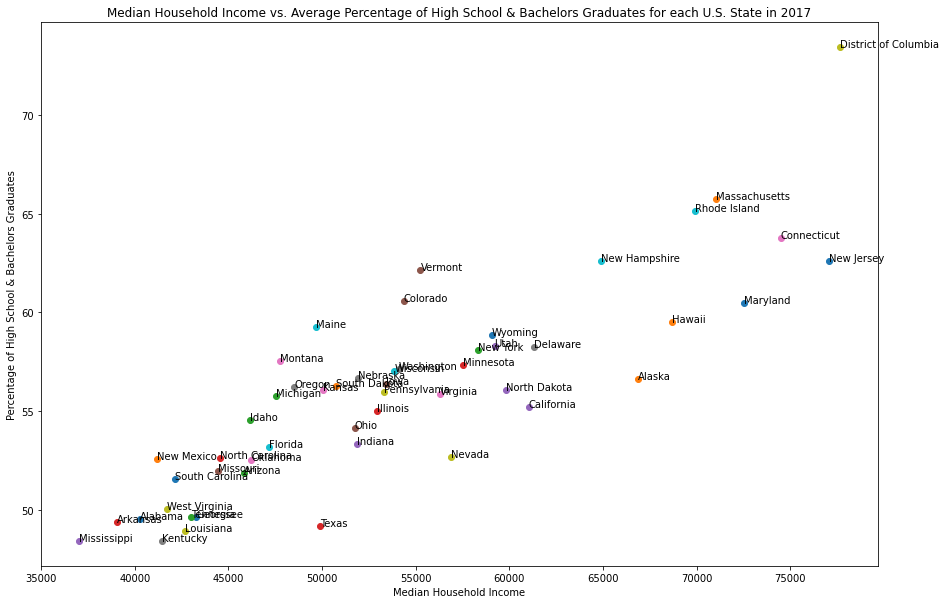

In [5]:
# plotting the median household income vs the graduates for each of the US states
states = df['state'].unique()
plt.figure(figsize=(15,10))

# create the scatter plot
# get average of factors for each state to plot
# plot each state and annotate accordinly on plot
for state in states:
    average_income = df[df.state == state]['median_household_income_2017']
    average_income = average_income.sum() / len(average_income)

    average_education = df[df.state == state]['combined_hs_bachelors_2017']
    average_education = average_education.sum() / len(average_education)

    plt.scatter(average_income, average_education)
    plt.annotate(state, (average_income, average_education))

# set up the plot detail information    
plt.title('Median Household Income vs. Average Percentage of High School & Bachelors Graduates for each U.S. State in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of High School & Bachelors Graduates')
plt.show()

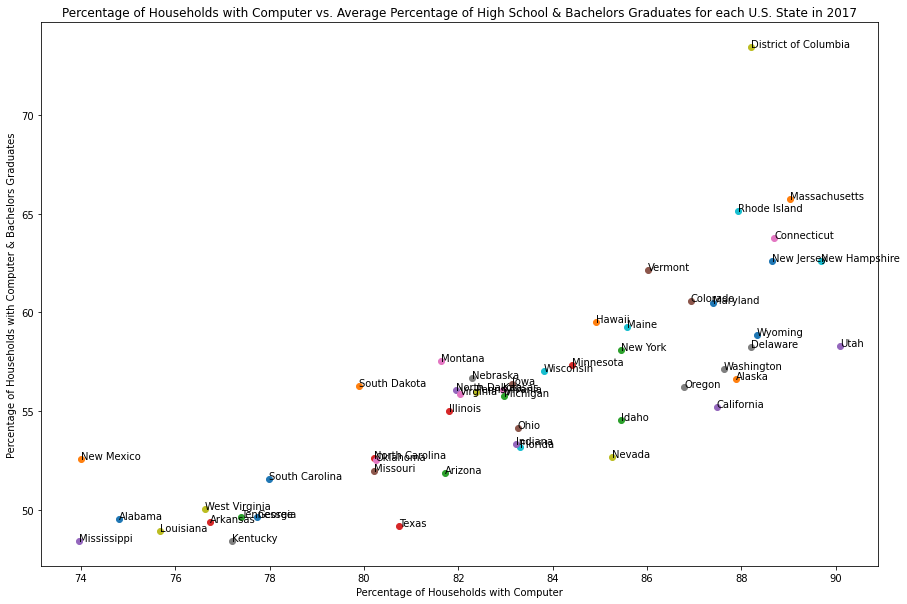

In [6]:
plt.figure(figsize=(15,10))

for state in states:
    average_computer = df[df.state == state]['computer_2017']
    average_computer = average_computer.sum() / len(average_computer)

    average_education = df[df.state == state]['combined_hs_bachelors_2017']
    average_education = average_education.sum() / len(average_education)

    plt.scatter(average_computer, average_education)
    plt.annotate(state, (average_computer, average_education))

plt.title('Percentage of Households with Computer vs. Average Percentage of High School & Bachelors Graduates for each U.S. State in 2017')
plt.xlabel('Percentage of Households with Computer')
plt.ylabel('Percentage of Households with Computer & Bachelors Graduates')
plt.show()

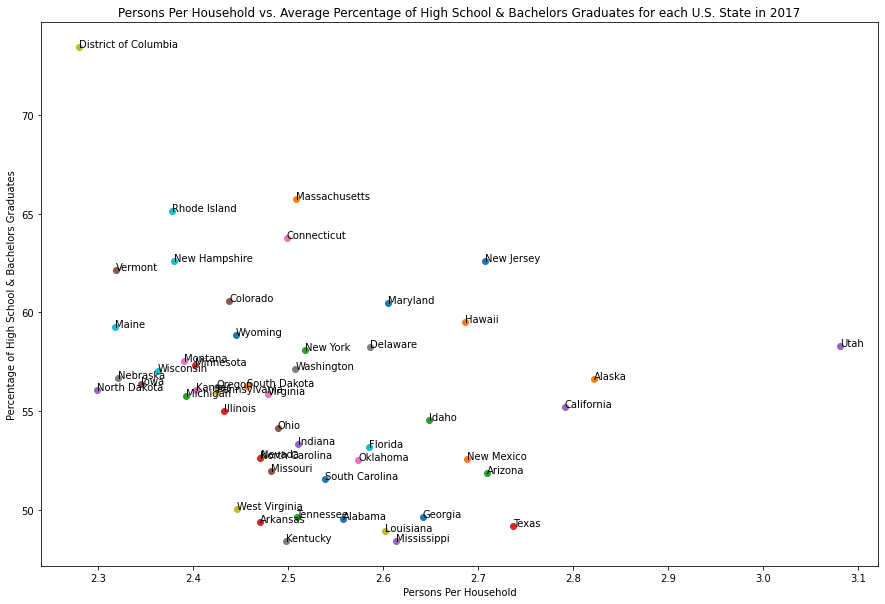

In [7]:
plt.figure(figsize=(15,10))

for state in states:
    average_persons = df[df.state == state]['persons_per_household_2017']
    average_persons = average_persons.sum() / len(average_persons)

    average_education = df[df.state == state]['combined_hs_bachelors_2017']
    average_education = average_education.sum() / len(average_education)

    plt.scatter(average_persons, average_education)
    plt.annotate(state, (average_persons, average_education))

plt.title('Persons Per Household vs. Average Percentage of High School & Bachelors Graduates for each U.S. State in 2017')
plt.xlabel('Persons Per Household')
plt.ylabel('Percentage of High School & Bachelors Graduates')
plt.show()

<p>It's clear that there is a positive, linear relationship for median household income and access to a computer between educational achievement. The same cannot be necessarily said about persons per household though. In order to visualize a linear relationship for each of these three factors in more depth, we look specifically at the state of Maryland. We repeat the same process used in the last three graphs, except this time including a generated linear regression line and plotting the data for each county in Maryland. </p>

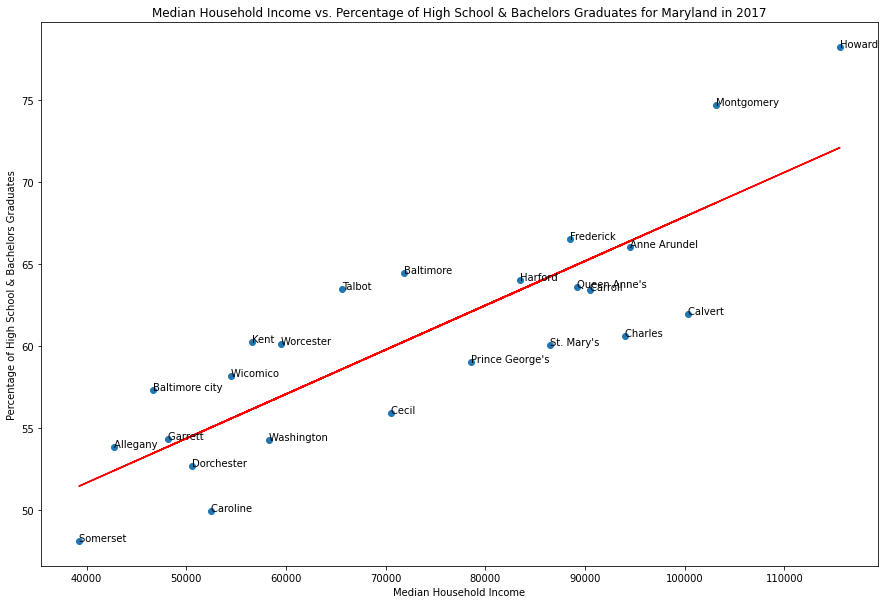

In [8]:
from sklearn.linear_model import LinearRegression

# plot household factor and educational achievement data
plt.figure(figsize=(15,10))
state = df[df.state == 'Maryland']
plt.scatter(state['median_household_income_2017'], state['combined_hs_bachelors_2017'])

# annotate for each county in Maryland on plot
for county in state['name']:
    x = state[state.name == county]['median_household_income_2017']
    y = state[state.name == county]['combined_hs_bachelors_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

# create, fit, and visualize a linear regression line
regr = LinearRegression()
regr.fit(state['median_household_income_2017'].to_numpy().reshape(-1,1), state['combined_hs_bachelors_2017']) 
predictions = regr.predict(state['median_household_income_2017'].to_numpy().reshape(-1,1))
plt.plot(state['median_household_income_2017'], predictions, 'r')

plt.title('Median Household Income vs. Percentage of High School & Bachelors Graduates for Maryland in 2017')
plt.xlabel('Median Household Income')
plt.ylabel('Percentage of High School & Bachelors Graduates')
plt.show()

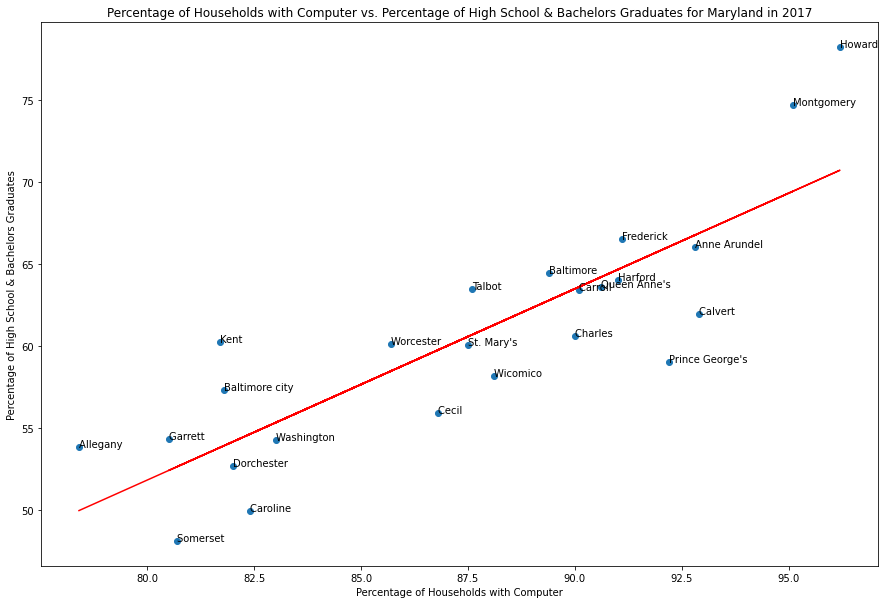

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(state['computer_2017'], state['combined_hs_bachelors_2017'])

for county in state['name']:
    x = state[state.name == county]['computer_2017']
    y = state[state.name == county]['combined_hs_bachelors_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['computer_2017'].to_numpy().reshape(-1,1), state['combined_hs_bachelors_2017']) 
predictions = regr.predict(state['computer_2017'].to_numpy().reshape(-1,1))
plt.plot(state['computer_2017'], predictions, 'r')

plt.title('Percentage of Households with Computer vs. Percentage of High School & Bachelors Graduates for Maryland in 2017')
plt.xlabel('Percentage of Households with Computer')
plt.ylabel('Percentage of High School & Bachelors Graduates')
plt.show()

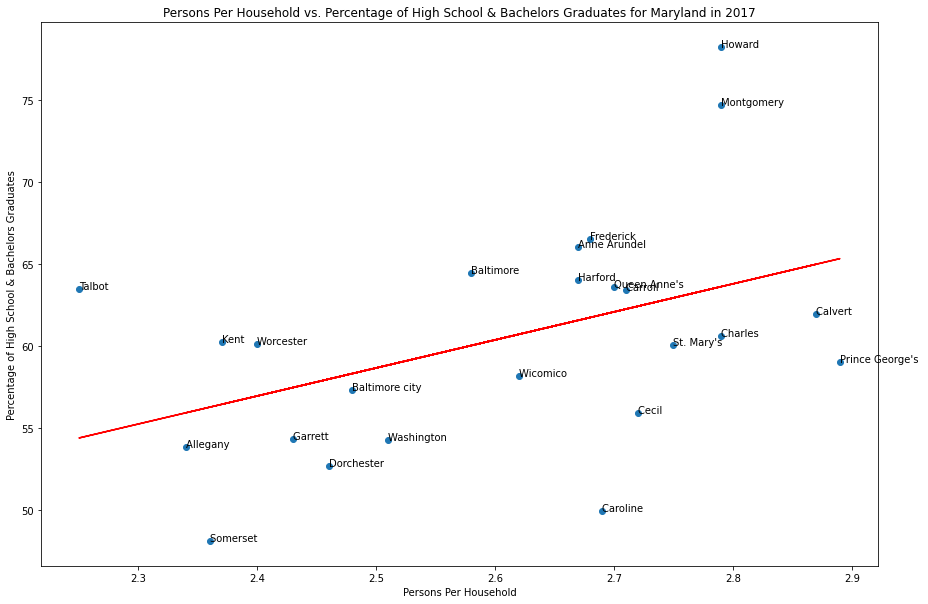

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(state['persons_per_household_2017'], state['combined_hs_bachelors_2017'])

for county in state['name']:
    x = state[state.name == county]['persons_per_household_2017']
    y = state[state.name == county]['combined_hs_bachelors_2017']

    county = county.replace('County', '')
    plt.annotate(county, (x,y))

regr = LinearRegression()
regr.fit(state['persons_per_household_2017'].to_numpy().reshape(-1,1), state['combined_hs_bachelors_2017']) 
predictions = regr.predict(state['persons_per_household_2017'].to_numpy().reshape(-1,1))
plt.plot(state['persons_per_household_2017'], predictions, 'r')

plt.title('Persons Per Household vs. Percentage of High School & Bachelors Graduates for Maryland in 2017')
plt.xlabel('Persons Per Household')
plt.ylabel('Percentage of High School & Bachelors Graduates')
plt.show()

<p>Given that these plots now contain regression lines, we can clearly see a well-fitted, positive, and linear relationship for median household income and access to a computer versus education achievement. In addition, the regression line displayed in the persons per household plot seems to a lot of data not surrounding the line itself, showing that its linear relationship might be far weaker when compared to the other household factors. Hence, the same trends seen with the earlier states plots are also seen in these Maryland counties plots, suggesting that there might be some household factors that do significantly impact educational achievement in a linear fashion, where median household income and access to a computer might be some of them while persons per household might not.</p>

## Hypothesis Testing & Machine Learning

In order to further analyze and verify the existence and strength of the linear relationships for the three household factors, we can use hypothesis testing and machine learning. The goal for hypothesis testing is to determine the strength of the fit of each linear regression relationship by using statsmodels. We use ordinary least squares regression, which is one of the simplest and most common methods. After performing hypothesis testing on each household factor, we'll be able to determine if there is a linear relationship between each household factor and educational achievement.

In [11]:
import statsmodels.api as sm

# hypothesis testing for median household income vs combined graduation rate to determine the strength of the fit
y = state['combined_hs_bachelors_2017']
x = state['median_household_income_2017']
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     combined_hs_bachelors_2017   R-squared:                       0.706
Model:                                    OLS   Adj. R-squared:                  0.692
Method:                         Least Squares   F-statistic:                     52.70
Date:                        Sun, 16 May 2021   Prob (F-statistic):           2.85e-07
Time:                                20:05:47   Log-Likelihood:                -65.581
No. Observations:                          24   AIC:                             135.2
Df Residuals:                              22   BIC:                             137.5
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           40.8340      2.817     14.494      0.000      34.991      46.677
median_household_income_2017     0.0003   3.73e-05      7.260      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.438   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                1.550
Skew:                           0.041   Prob(JB):                        0.461
Kurtosis:                       1.758   Cond. No.                     2.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
y = state['combined_hs_bachelors_2017']
x = state['computer_2017']
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     combined_hs_bachelors_2017   R-squared:                       0.711
Model:                                    OLS   Adj. R-squared:                  0.697
Method:                         Least Squares   F-statistic:                     54.02
Date:                        Sun, 16 May 2021   Prob (F-statistic):           2.34e-07
Time:                                20:05:47   Log-Likelihood:                -65.372
No. Observations:                          24   AIC:                             134.7
Df Residuals:                              22   BIC:                             137.1
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -41.4921     13.894     -2.986      0.007     -70.307     -12.677
computer_2017     1.1665      0.159      7.350      0.000       0.837       1.496
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.503
Skew:                           0.161   Prob(JB):                        0.778
Kurtosis:                       2.369   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
y = state['combined_hs_bachelors_2017']
x = state['persons_per_household_2017']
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     combined_hs_bachelors_2017   R-squared:                       0.197
Model:                                    OLS   Adj. R-squared:                  0.161
Method:                         Least Squares   F-statistic:                     5.402
Date:                        Sun, 16 May 2021   Prob (F-statistic):             0.0297
Time:                                20:05:47   Log-Likelihood:                -77.616
No. Observations:                          24   AIC:                             159.2
Df Residuals:                              22   BIC:                             161.6
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         15.9221     19.207      0.829      0.416     -23.911      55.755
persons_per_household_2017    17.0973      7.356      2.324      0.030       1.842      32.353
==============================================================================
Omnibus:                        1.273   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.529   Jarque-Bera (JB):                0.789
Skew:                           0.442   Prob(JB):                        0.674
Kurtosis:                       2.906   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value for the median household income relationship is 0.706, for the access to a computer relationship is 0.711, and for the persons per household relationship is 0.197. This means that the median household income and access to a omputer relationships were fairly strong relationships, while the persons per household relationship was a far weaker relationship.

From the hypothesis testing, we have sufficient evidence to reject the null hypotheses of no relationship between median household income and access to a computer and combined graduation rates, given the p-values are less than our significance level of 0.05. However, we cannot reject the null hypothesis of no relationship between persons per household and combined graduation rates, given one of the p-values is greater than the significance level of 0.05.

In order to further validate our results, we can create and fit linear regression models and compare their R-squared values to the ones seen in hypothesis testing. We will now create, fit, and test machine learning models on each household factor against the combined graduation rates using linear regression.

In [84]:
from sklearn import tree
from sklearn.model_selection import train_test_split

# create linear regression test to determine the strength of the fit compared to the previous hypothesis testing
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(np.array(state['median_household_income_2017'].values), np.array(state['combined_hs_bachelors_2017'].values), test_size=0.25)
lr.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

y_train_tree = lr.predict(X_train.reshape(-1, 1))
y_test_tree = lr.predict(X_test.reshape(-1, 1))

# get r-squared values for training and testing datasets
acc_train_tree = lr.score(X_train.reshape(-1, 1), y_train)
acc_test_tree = lr.score(X_test.reshape(-1, 1), y_test)
acc_train_tree, acc_test_tree

(0.7089435214057382, 0.6553940941546065)

In [80]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(np.array(state['computer_2017'].values), np.array(state['combined_hs_bachelors_2017'].values), test_size=0.25)
lr.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

y_train_tree = lr.predict(X_train.reshape(-1, 1))
y_test_tree = lr.predict(X_test.reshape(-1, 1))

acc_train_tree = lr.score(X_train.reshape(-1, 1), y_train)
acc_test_tree = lr.score(X_test.reshape(-1, 1), y_test)
acc_train_tree, acc_test_tree

(0.7029996080872234, 0.6702080625700917)

In [76]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(np.array(state['persons_per_household_2017'].values), np.array(state['combined_hs_bachelors_2017'].values), test_size=0.25)
lr.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

y_train_tree = lr.predict(X_train.reshape(-1, 1))
y_test_tree = lr.predict(X_test.reshape(-1, 1))


acc_train_tree = lr.score(X_train.reshape(-1, 1), y_train)
acc_test_tree = lr.score(X_test.reshape(-1, 1), y_test)
acc_train_tree, acc_test_tree

(0.1959352455235044, 0.155132068546192)

After creating, fitting, and testing our machine learning models for each of the three household factors, we see similar results to the ones seen in hypothesis testing. The R-squared value for the testing median household income relationship is 0.655, for the access to a computer relationship is 0.670, and for the persons per household relationship is 0.155. These R-squared values are fairly similar to the ones retrieved from hypothesis testing and resemble the same overall conclusion that there is a significant relationship between median household income and educational achievement and access to a computer and educational achievement, while there's not enough significant evidence to say the same for persons per household and educational achievement.

## Conclusion

The goal of this tutorial was to analyze the data trends of household factors that may impact educational success. After tidying up the data to sort through unneeded information, we settled on three factors that was worth further analysis to see how strongly they impacted academic achievement, these factors being median household income, percentage of households that own a computer, and the average people per household. These data columns were especially of note since technology and money often play an important part in getting ahead in school. Without access to technology, it becomes exceedingly difficult to complete assignments or do other research for school. 

Upon plotting the factors, we began to see general trends between the Maryland counties plots and the US states plots. The regression lines demonstrated a linear relationship between the median household income and the percentage of households that own a computer and the success of the students. Further analysis in the hypothesis testing had results that continued to support this claim. However, the factor of persons per household was unable to hold up once put to hypothesis testing and machine learning. The overall results demonstrated that specifically household income and availability of a computer impacts a student's ability to learn and that there is a correlation between home situations and academic achievement. There are definitely more household factors that greatly impact the level of academic achivement someone can have that deserve more continual research in the hope to improve the overall educational quality in America. In conclusion, we can see that some, not all, household factors do significantly impact the educational achievement and this can be explained by the increase in cost of living and technological use in the educational system.